In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')
from scipy import stats

% matplotlib inline
%load_ext autoreload
% autoreload 2

In [2]:
pre_depo = pd.read_pickle('/data/ana_pre_50_depo_reci')
pre_hypo = pd.read_pickle('/data/ana_pre_50_hypo_reci')

In [3]:
pre_depo

,Before,After,File name,elimi
77,"{'trace_y1': [[2.90447972924e-12, 4.2717388129...","{'trace_y1': [[4.33871897924e-12, 6.1847589667...",2017071202,40
79,"{'trace_y1': [[7.5419108191e-13, 5.13237297208...","{'trace_y1': [[1.60048179977e-12, 1.4185191950...",2017060101,30
80,"{'trace_y1': [[3.09282704899e-13, 2.5722729630...","{'trace_y1': [[1.54595360989e-12, 1.7111416120...",2017060501,24
98,"{'trace_y1': [[1.57764030957e-13, 3.8200514274...","{'trace_y1': [[9.86618776612e-13, 1.3165229361...",2017062602,25
100,"{'trace_y1': [[7.09068363545e-13, 6.5360651098...","{'trace_y1': [[3.31538158795e-13, 2.1447884516...",2017062301,50
173,"{'trace_y1': [[2.4633016014e-12, 2.41725510146...","{'trace_y1': [[1.2595833063e-14, 2.49077500645...",2018032801,25
174,"{'trace_y1': [[6.89103646031e-15, 4.2420515125...","{'trace_y1': [[5.43767778043e-13, 4.9212624194...",2018032801,25


In [4]:
pre_hypo

,Before,After,File name,elimi
72,"{'trace_y1': [[1.76257447354e-13, 9.4978019721...","{'trace_y1': [[2.31494913051e-14, 1.0995644182...",2016072902,35
73,"{'trace_y1': [[4.90340672498e-13, 6.7835208449...","{'trace_y1': [[6.46631370682e-13, 7.6863794219...",2017051601,60
75,"{'trace_y1': [[2.64730114188e-12, 3.4915438406...","{'trace_y1': [[2.98834648162e-12, 3.9843797721...",2017051202,60
76,"{'trace_y1': [[3.58284018486e-12, 4.3164901312...","{'trace_y1': [[5.480316296e-12, 6.24904026937e...",2017071201,50
78,"{'trace_y1': [[3.23377445326e-12, 3.8766353913...","{'trace_y1': [[8.31300627822e-13, 1.2278787567...",2017071301,60
101,"{'trace_y1': [[1.06483544316e-12, 5.2001431050...","{'trace_y1': [[1.31947149375e-12, 1.7877621777...",2017062803,30


/src/Patch_ana/Patch_ana/patch_pip.py:500: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp_rm, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


(0.2, 1.8)

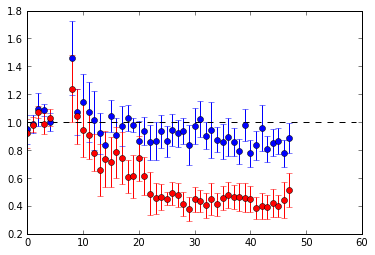

In [5]:
ave_ptl_resp = np.ones((len(pre_depo), 60))*np.nan

ave_ptl_mean_2,ave_ptl_ste_2,ave_ptl_2  = patch_pip.samp_ave(pre_depo, ave_ptl_resp)
ave_ptl_mean_2 = ave_ptl_mean_2[:-12]
ave_ptl_ste_2 = ave_ptl_ste_2[:-12]
ave_ptl_2 = ave_ptl_2[:, :-12]


plt.errorbar(x=np.arange(len(ave_ptl_mean_2)), y=ave_ptl_mean_2, yerr=ave_ptl_ste_2, fmt='bo')

ave_ptl_resp = np.ones((len(pre_hypo), 60))*np.nan
ave_ptl_mean_50,ave_ptl_ste_50, ave_ptl_50 = patch_pip.samp_ave(pre_hypo, ave_ptl_resp)
ave_ptl_mean_50 = ave_ptl_mean_50[:-12]
ave_ptl_ste_50 = ave_ptl_ste_50[:-12]
ave_ptl_50 = ave_ptl_50[:, :-12]

plt.errorbar(x=np.arange(len(ave_ptl_mean_50)), y=ave_ptl_mean_50, yerr=ave_ptl_ste_50, fmt='ro')

plt.plot(np.ones((60))*1, 'k--')
plt.ylim([0.2, 1.8])



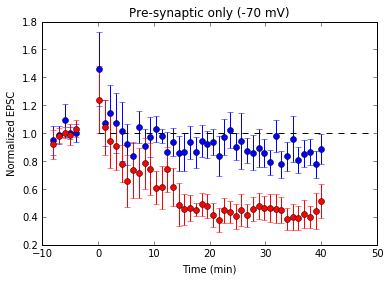

In [6]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_2, ave_ptl_ste_2
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.linspace(-6 * 4/3, len(ave_ptl_mean_2cp)- 6 * 4/3, len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='bo', label='2Hz (n={a})'.format(a=len(pre_depo)))

ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50, ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste= patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.linspace(-6 * 4/3, len(ave_ptl_mean_50cp)- 6 * 4/3, len(ave_ptl_mean_2cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ro', label='50Hz (n={a})'.format(a=len(pre_hypo)))

plt.plot(np.ones((50))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
# plt.legend()
plt.ylim([0.2, 1.8])
plt.title('Pre-synaptic only (-70 mV)')

with PdfPages('/data/Figure1_9.pdf') as pdf:
    pdf.savefig()

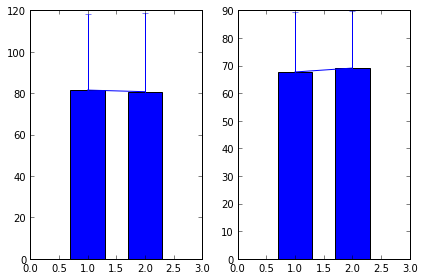

In [7]:
ir_bef_2 = []
ir_bef_50 = []
ir_aft_2 = []
ir_aft_50 = []

for i in range(len(pre_depo)):
    ir_bef_2.append(np.nanmean(pre_depo.Before.iloc[i]['ir']))
    ir_aft_2.append(np.nanmean(pre_depo.After.iloc[i]['ir'][-10:]))
    
for i in range(len(pre_hypo)):
    ir_bef_50.append(np.nanmean(pre_hypo.Before.iloc[i]['ir']))
    ir_aft_50.append(np.nanmean(pre_hypo.After.iloc[i]['ir'][-10:]))


ir_bef2_mean = np.nanmean(ir_bef_2)
ir_bef2_std = np.nanstd(ir_bef_2)
ir_aft2_mean = np.nanmean(ir_aft_2)
ir_aft2_std = np.nanstd(ir_aft_2)
ir_bef50_mean = np.nanmean(ir_bef_50)
ir_bef50_std = np.nanstd(ir_bef_50)
ir_aft50_mean = np.nanmean(ir_aft_50)
ir_aft50_std = np.nanstd(ir_aft_50)

fig, ax = plt.subplots(1,2, sharex=True)
ax[0].bar([1,2], [ir_bef2_mean, ir_aft2_mean], align='center', width=0.6)
ax[0].errorbar(x=[1,2],y=[ir_bef2_mean, ir_aft2_mean], yerr=[ir_bef2_std, ir_aft2_std], fmt='')
ax[0].set_xlim(0,3)
ax[1].bar([1,2], [ir_bef50_mean, ir_aft50_mean], align='center', width=0.6)
ax[1].errorbar(x=[1,2],y=[ir_bef50_mean, ir_aft50_mean], yerr=[ir_bef50_std, ir_aft50_std], fmt='')
ax[1].set_xlim(0,3)

plt.tight_layout()

with PdfPages('/data/Supp2_F.pdf') as pdf:
    pdf.savefig()

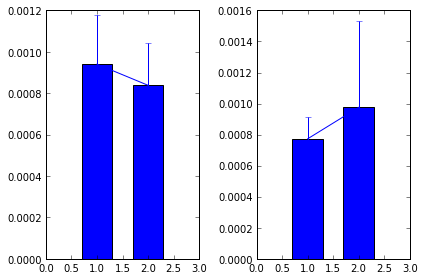

In [8]:
ir_bef_2 = []
ir_bef_50 = []
ir_aft_2 = []
ir_aft_50 = []

for i in range(len(pre_depo)):
    ir_bef_2.append(np.nanmean(pre_depo.Before.iloc[i]['onset_tau']))
    ir_aft_2.append(np.nanmean(pre_depo.After.iloc[i]['onset_tau'][-10:]))
    
for i in range(len(pre_hypo)):
    ir_bef_50.append(np.nanmean(pre_hypo.Before.iloc[i]['onset_tau']))
    ir_aft_50.append(np.nanmean(pre_hypo.After.iloc[i]['onset_tau'][-10:]))


ir_bef2_mean = np.nanmean(ir_bef_2)
ir_bef2_std = np.nanstd(ir_bef_2)
ir_aft2_mean = np.nanmean(ir_aft_2)
ir_aft2_std = np.nanstd(ir_aft_2)
ir_bef50_mean = np.nanmean(ir_bef_50)
ir_bef50_std = np.nanstd(ir_bef_50)
ir_aft50_mean = np.nanmean(ir_aft_50)
ir_aft50_std = np.nanstd(ir_aft_50)

fig, ax = plt.subplots(1,2, sharex=True)
ax[0].bar([1,2], [ir_bef2_mean, ir_aft2_mean], align='center', width=0.6)
ax[0].errorbar(x=[1,2],y=[ir_bef2_mean, ir_aft2_mean], yerr=[ir_bef2_std, ir_aft2_std], fmt='')
ax[0].set_xlim(0,3)
ax[1].bar([1,2], [ir_bef50_mean, ir_aft50_mean], align='center', width=0.6)
ax[1].errorbar(x=[1,2],y=[ir_bef50_mean, ir_aft50_mean], yerr=[ir_bef50_std, ir_aft50_std], fmt='')
ax[1].set_xlim(0,3)

plt.tight_layout()

with PdfPages('/data/Supp2_G.pdf') as pdf:
    pdf.savefig()

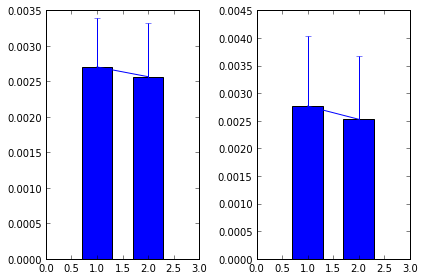

In [9]:
ir_bef_2 = []
ir_bef_50 = []
ir_aft_2 = []
ir_aft_50 = []

for i in range(len(pre_depo)):
    ir_bef_2.append(np.nanmean(pre_depo.Before.iloc[i]['decay_tau']))
    ir_aft_2.append(np.nanmean(pre_depo.After.iloc[i]['decay_tau'][-10:]))
    
for i in range(len(pre_hypo)):
    ir_bef_50.append(np.nanmean(pre_hypo.Before.iloc[i]['decay_tau']))
    ir_aft_50.append(np.nanmean(pre_hypo.After.iloc[i]['decay_tau'][-10:]))


ir_bef2_mean = np.nanmean(ir_bef_2)
ir_bef2_std = np.nanstd(ir_bef_2)
ir_aft2_mean = np.nanmean(ir_aft_2)
ir_aft2_std = np.nanstd(ir_aft_2)
ir_bef50_mean = np.nanmean(ir_bef_50)
ir_bef50_std = np.nanstd(ir_bef_50)
ir_aft50_mean = np.nanmean(ir_aft_50)
ir_aft50_std = np.nanstd(ir_aft_50)

fig, ax = plt.subplots(1,2, sharex=True)
ax[0].bar([1,2], [ir_bef2_mean, ir_aft2_mean], align='center', width=0.6)
ax[0].errorbar(x=[1,2],y=[ir_bef2_mean, ir_aft2_mean], yerr=[ir_bef2_std, ir_aft2_std], fmt='')
ax[0].set_xlim(0,3)
ax[1].bar([1,2], [ir_bef50_mean, ir_aft50_mean], align='center', width=0.6)
ax[1].errorbar(x=[1,2],y=[ir_bef50_mean, ir_aft50_mean], yerr=[ir_bef50_std, ir_aft50_std], fmt='')
ax[1].set_xlim(0,3)

plt.tight_layout()

with PdfPages('/data/Supp2_H.pdf') as pdf:
    pdf.savefig()

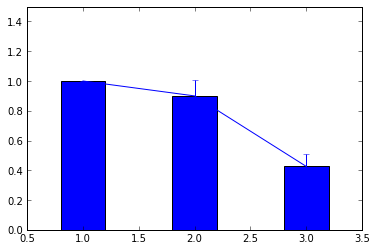

In [10]:
# Compare amplitude
mean_amp_aft_2Hz = np.nanmean(np.nanmean(ave_ptl_2[:, -10:], axis=1))
mean_amp_aft_50Hz = np.nanmean(np.nanmean(ave_ptl_50[:, -10:], axis=1))

std_amp_aft_2Hz = np.nanstd(np.nanmean(ave_ptl_2[:, -10:], axis=1))/np.sqrt(6)
std_amp_aft_50Hz = np.nanstd(np.nanmean(ave_ptl_50[:, -10:], axis=1))/np.sqrt(6)
plt.bar([1,2,3], [1, mean_amp_aft_2Hz, mean_amp_aft_50Hz], align='center', width=0.4)
plt.errorbar(x=[1,2,3], y=[1, mean_amp_aft_2Hz, mean_amp_aft_50Hz],yerr = [0, std_amp_aft_2Hz, std_amp_aft_50Hz], fmt='')
plt.ylim([0,1.5])

with PdfPages('/data/Figure1_12.pdf') as pdf:
    pdf.savefig()

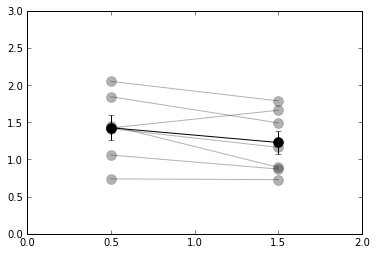

In [19]:
# Compare PPR
mean_PPR_bef = [np.nanmean(pre_depo['Before'].loc[i]['PPR']) for i in pre_depo['Before'].index]
mean_PPR_aft = [np.nanmean(pre_depo['After'].loc[i]['PPR'][-10:]) for i in pre_depo['After'].index]

mean_PPR_ave_bef = np.mean(mean_PPR_bef)
mean_PPR_std_bef = np.std(mean_PPR_bef)/np.sqrt(6)
mean_PPR_ave_aft = np.mean(mean_PPR_aft)
mean_PPR_std_aft = np.std(mean_PPR_aft)/np.sqrt(6)

for i, j in zip(mean_PPR_bef, mean_PPR_aft):
    plt.plot([0.5,1.5], [i, j], 'ko-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_PPR_ave_bef, mean_PPR_ave_aft], [mean_PPR_std_bef, mean_PPR_std_aft], fmt='k-o', markersize=10)
plt.xlim([0,2])
plt.ylim([0,3])
with PdfPages('/data/Supp1_3.pdf') as pdf:
    pdf.savefig()

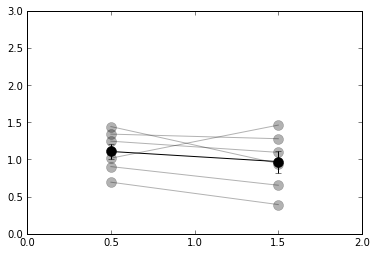

In [20]:
# Compare PPR
mean_PPR_bef = [np.nanmean(pre_hypo['Before'].loc[i]['PPR']) for i in pre_hypo['Before'].index]
mean_PPR_aft = [np.nanmean(pre_hypo['After'].loc[i]['PPR'][-10:]) for i in pre_hypo['After'].index]

mean_PPR_ave_bef = np.mean(mean_PPR_bef)
mean_PPR_std_bef = np.std(mean_PPR_bef)/np.sqrt(6)
mean_PPR_ave_aft = np.mean(mean_PPR_aft)
mean_PPR_std_aft = np.std(mean_PPR_aft)/np.sqrt(6)

for i, j in zip(mean_PPR_bef, mean_PPR_aft):
    plt.plot([0.5,1.5], [i, j], 'ko-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_PPR_ave_bef, mean_PPR_ave_aft], [mean_PPR_std_bef, mean_PPR_std_aft], fmt='k-o', markersize=10)
plt.xlim([0,2])
plt.ylim([0,3])
with PdfPages('/data/Supp1_4.pdf') as pdf:
    pdf.savefig()

Ttest_relResult(statistic=-2.8100364458028659, pvalue=0.037546619796152016)


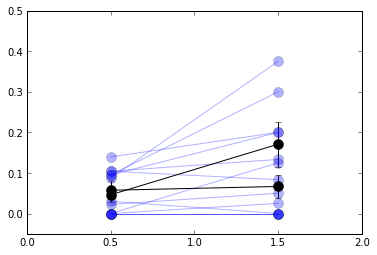

In [22]:
# Compare failure rate
mean_fail_bef = [np.sum(pre_depo['Before'].loc[i]['failure'])/1.5/len(pre_depo['Before'].loc[i]['failure']) for i in pre_depo['Before'].index]
mean_fail_aft = [np.sum(pre_depo['After'].loc[i]['failure'][-40:])/1.5/40 for i in pre_depo['After'].index]

mean_fail_ave_bef = np.mean(mean_fail_bef)
mean_fail_std_bef = np.std(mean_fail_bef)/np.sqrt(6)
mean_fail_ave_aft = np.mean(mean_fail_aft)
mean_fail_std_aft = np.std(mean_fail_aft)/np.sqrt(6)

for i, j in zip(mean_fail_bef, mean_fail_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_fail_ave_bef, mean_fail_ave_aft], [mean_fail_std_bef, mean_fail_std_aft], fmt='k-o', markersize=10)

plt.xlim([0,2])
plt.ylim([-0.05,0.5])

# Compare failure rate
mean_fail_bef = [np.sum(pre_hypo['Before'].loc[i]['failure'])*4/len(pre_hypo['Before'].loc[i]['failure']) for i in pre_hypo['Before'].index]
mean_fail_aft = [np.sum(pre_hypo['After'].loc[i]['failure'][-40:])/40 for i in pre_hypo['After'].index]
mean_fail_aft[-1] = 0.2
print(stats.ttest_rel(mean_fail_bef, mean_fail_aft))


mean_fail_ave_bef = np.mean(mean_fail_bef)
mean_fail_std_bef = np.std(mean_fail_bef)/np.sqrt(6)
mean_fail_ave_aft = np.mean(mean_fail_aft)
mean_fail_std_aft = np.std(mean_fail_aft)/np.sqrt(6)

for i, j in zip(mean_fail_bef, mean_fail_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_fail_ave_bef, mean_fail_ave_aft], [mean_fail_std_bef, mean_fail_std_aft], fmt='k-o', markersize=10)

plt.xlim([0,2])
plt.ylim([-0.05,0.5])

with PdfPages('/data/Figure1_14.pdf') as pdf:
    pdf.savefig()

In [11]:
pre_hypo['After'].index

Int64Index([72, 73, 75, 76, 78, 101], dtype='int64')

Ttest_relResult(statistic=-2.8100364458028659, pvalue=0.037546619796152016)


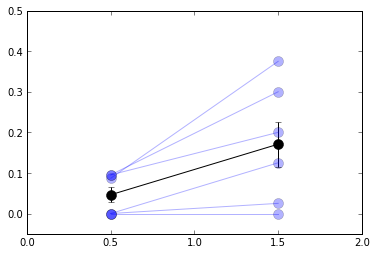

In [53]:
# Compare failure rate
mean_fail_bef = [np.sum(pre_hypo['Before'].loc[i]['failure'])*4/len(pre_hypo['Before'].loc[i]['failure']) for i in pre_hypo['Before'].index]
mean_fail_aft = [np.sum(pre_hypo['After'].loc[i]['failure'][-40:])/40 for i in pre_hypo['After'].index]
mean_fail_aft[-1] = 0.2
print(stats.ttest_rel(mean_fail_bef, mean_fail_aft))


mean_fail_ave_bef = np.mean(mean_fail_bef)
mean_fail_std_bef = np.std(mean_fail_bef)/np.sqrt(6)
mean_fail_ave_aft = np.mean(mean_fail_aft)
mean_fail_std_aft = np.std(mean_fail_aft)/np.sqrt(6)

for i, j in zip(mean_fail_bef, mean_fail_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_fail_ave_bef, mean_fail_ave_aft], [mean_fail_std_bef, mean_fail_std_aft], fmt='k-o', markersize=10)

plt.xlim([0,2])
plt.ylim([-0.05,0.5])

with PdfPages('/data/Figure1_14.pdf') as pdf:
    pdf.savefig()

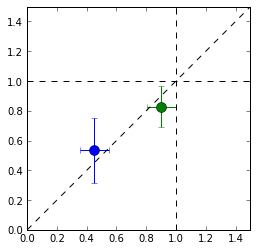

In [32]:
# CV analysis
cv_mean_bef = [np.nanmean(pre_hypo['Before'].loc[i]['raw_amp1'][-20:]) for i in pre_hypo['Before'].index]
cv_mean_aft = [np.nanmean(ave_ptl_50[i, -10:]) * cv_mean_bef[i] for i in range(ave_ptl_50.shape[0])]
               
cv_std_bef = [np.nanstd(pre_hypo['Before'].loc[i]['raw_amp1'][-15:]) for i in pre_hypo['Before'].index]
end_aft = [pre_hypo['elimi'].values[i] for i in range(len(pre_hypo))]
cv_std_aft = [np.nanstd(pre_hypo['After'].loc[i]['raw_amp1'][max(end_aft[k]*3-100,0):end_aft[k]*3]) for k,i in enumerate(pre_hypo['After'].index)]

r = [i ** 2/j ** 2 for i, j in zip([k/m for k, m in zip(cv_std_bef,cv_mean_bef)], [k/m for k, m in zip(cv_std_aft,cv_mean_aft)])]
pi = [i/j for i, j in zip(cv_mean_aft, cv_mean_bef)]


plt.errorbar(np.mean(pi), np.mean(r), np.std(r)/np.sqrt(len(r)), np.std(pi)/np.sqrt(len(pi)),  'o', markersize=10)

# CV analysis
cv_mean_bef = [np.nanmean(pre_depo['Before'].loc[i]['raw_amp1'][-20:]) for i in pre_depo['Before'].index]
cv_mean_aft = [np.nanmean(ave_ptl_2[i, -10:]) * cv_mean_bef[i] for i in range(ave_ptl_2.shape[0])]
               
cv_std_bef = [np.nanstd(pre_depo['Before'].loc[i]['raw_amp1'][-15:]) for i in pre_depo['Before'].index]
end_aft = [pre_depo['elimi'].values[i] for i in range(len(pre_depo))]
cv_std_aft = [np.nanstd(pre_depo['After'].loc[i]['raw_amp1'][max(end_aft[k]*3-100,0):end_aft[k]*3]) for k,i in enumerate(pre_depo['After'].index)]

r = [i ** 2/j ** 2 for i, j in zip([k/m for k, m in zip(cv_std_bef,cv_mean_bef)], [k/m for k, m in zip(cv_std_aft,cv_mean_aft)])]
pi = [i/j for i, j in zip(cv_mean_aft, cv_mean_bef)]


plt.errorbar(np.mean(pi), np.mean(r), np.std(r)/np.sqrt(len(r)), np.std(pi)/np.sqrt(len(pi)),  'o', markersize=10)

plt.plot(np.arange(0, 4, 0.5),np.arange(0, 4, 0.5), 'k--')
plt.plot(np.arange(0, 4, 0.5), np.ones(8),'k--')
plt.plot(np.ones(8),np.arange(0, 4, 0.5),'k--')
plt.xlim([0, 1.5])
plt.ylim([0, 1.5])
plt.axes().set_aspect('equal')
with PdfPages('/data/Figure1_15.pdf') as pdf:
    pdf.savefig()